In [1]:
!pip install --q fosforio[snowflake]

ERROR: snowflake-snowpark-python 1.0.0 has requirement snowflake-connector-python<3.0.0,>=2.7.12, but you'll have snowflake-connector-python 3.6.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement cryptography<39.0.0,>=3.1.0, but you'll have cryptography 41.0.7 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement packaging<24,>=20.9, but you'll have packaging 24.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.0 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement snowflake-snowpark-python<2,>=1.4.0, but you'll have snowflake-snowpark-python 1.0.0 which is incompatible.
ERROR: openapi-schema-validator 0.6.2 has requirement jsonschema<5.0.0,>=4.19.1, but you'll have jsonschema 3.2.0 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Flask==2.1.1; python_version >= "3.7", but you'll have flask 2.2.5 which is incompatible.
ERROR: mosaic-ai-se

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from fosforio import snowflake
import pandas as pd
import matplotlib.pyplot as plt

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


Matplotlib created a temporary cache directory at /tmp/matplotlib-kjn_x2k9 because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import seaborn as sns
import subprocess

# create_temp_table warning suppresion
import warnings; warnings.simplefilter('ignore')
import configparser

In [3]:
# To get snowflake connection object with a default snowflake connection created by the user, if available.
snowflake.get_connection()

# To get snowflake connection object with a specific connection name
#snowflake.get_connection(connection_name="FDC_SNOWFLAKE")

User name picked from OS env: manishh.singh@fosfor.com
Fetching connections created by manishh.singh@fosfor.com user
Connection names fetched ['FDC_SNOWFLAKE', 'FDC_SNOWFLAKE', 'FDC_SNOWFLAKE', 'FDC_SNOWFLAKE'], created by manishh.singh@fosfor.com
Exception occurred in getting snowflake connection: 'connectionSources'


In [4]:
# To read a specific dataset published from a snowflake connection
df = snowflake.get_dataframe("TRANSACTION_MASTER_DATA")

In [5]:
df.shape

(328860, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328860 entries, 0 to 328859
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DATE                     328860 non-null  object 
 1   WEEKDAY_FLAG             328860 non-null  object 
 2   HOLIDAY_FLAG             328860 non-null  object 
 3   BANK_ID                  328860 non-null  int8   
 4   STATE                    328860 non-null  object 
 5   BANK_NAME                328860 non-null  object 
 6   ATM_ID                   328860 non-null  object 
 7   DISPENSED_AMOUNT         328860 non-null  float64
 8   TOTAL_TRANSACTION_COUNT  328860 non-null  float64
 9   DOWNTIME_IN_MINS         328860 non-null  float64
 10  ATM_MAX_CAPACITY         328860 non-null  float64
dtypes: float64(4), int8(1), object(6)
memory usage: 25.4+ MB


In [7]:
df.head()

,DATE,WEEKDAY_FLAG,HOLIDAY_FLAG,BANK_ID,STATE,BANK_NAME,ATM_ID,DISPENSED_AMOUNT,TOTAL_TRANSACTION_COUNT,DOWNTIME_IN_MINS,ATM_MAX_CAPACITY
0,2023-01-29,Y,N,3,Maine,Citibank,TBH000274025,225180.0,90.0,0.0,2860000.0
1,2023-01-30,Y,N,3,Maine,Citibank,TBH000274025,262440.0,117.0,0.0,2860000.0
2,2023-01-31,Y,N,3,Maine,Citibank,TBH000274025,561150.0,160.0,0.0,2860000.0
3,2023-02-01,Y,N,3,Maine,Citibank,TBH000274025,437220.0,129.0,0.0,2860000.0
4,2023-02-02,Y,N,3,Maine,Citibank,TBH000274025,360900.0,119.0,0.0,2860000.0


In [8]:
df.columns

Index(['DATE', 'WEEKDAY_FLAG', 'HOLIDAY_FLAG', 'BANK_ID', 'STATE', 'BANK_NAME',
       'ATM_ID', 'DISPENSED_AMOUNT', 'TOTAL_TRANSACTION_COUNT',
       'DOWNTIME_IN_MINS', 'ATM_MAX_CAPACITY'],
      dtype='object')

In [9]:
column = ['WEEKDAY_FLAG', 'HOLIDAY_FLAG', 'BANK_ID', 'STATE', 'BANK_NAME','ATM_ID']
for col in column:
    print ("Column name - ", col, "---> ",df[col].value_counts())
    print ("=============================================")

Column name -  WEEKDAY_FLAG --->  WEEKDAY_FLAG
Y    234780
N     94080
Name: count, dtype: int64
Column name -  HOLIDAY_FLAG --->  HOLIDAY_FLAG
N    315420
Y     13440
Name: count, dtype: int64
Column name -  BANK_ID --->  BANK_ID
3    109620
1    109620
2    109620
Name: count, dtype: int64
Column name -  STATE --->  STATE
Minnesota         10962
Kansas            10962
Nevada            10962
Tennessee         10179
Nebraska          10179
Montana           10179
Alabama            9396
Maine              8613
Hawaii             8613
Vermont            8613
Michigan           8613
Ohio               8613
Missouri           7830
Colorado           7830
Idaho              7830
Wisconsin          7830
Illinois           7830
North Dakota       7830
Utah               7830
North Carolina     7830
Oregon             7047
Florida            7047
Arizona            6264
Oklahoma           6264
Georgia            6264
South Dakota       6264
Delaware           6264
New Mexico         6264
Lo

In [10]:
df.isnull().sum()

DATE                       0
WEEKDAY_FLAG               0
HOLIDAY_FLAG               0
BANK_ID                    0
STATE                      0
BANK_NAME                  0
ATM_ID                     0
DISPENSED_AMOUNT           0
TOTAL_TRANSACTION_COUNT    0
DOWNTIME_IN_MINS           0
ATM_MAX_CAPACITY           0
dtype: int64

In [11]:
df.describe()

,BANK_ID,DISPENSED_AMOUNT,TOTAL_TRANSACTION_COUNT,DOWNTIME_IN_MINS,ATM_MAX_CAPACITY
count,328860.000000,3.288600e+05,328860.000000,328860.000000,3.288600e+05
mean,2.000000,3.217324e+05,83.735632,126.453506,3.300000e+06
std,0.816498,2.818005e+05,71.546692,305.196984,3.840641e+05
min,1.000000,0.000000e+00,0.000000,0.000000,2.420000e+06
25%,1.000000,7.227000e+04,22.000000,0.000000,2.860000e+06
50%,2.000000,2.866500e+05,78.000000,0.000000,3.520000e+06
75%,3.000000,4.904100e+05,124.000000,37.000000,3.520000e+06
max,3.000000,1.936620e+06,504.000000,1296.000000,3.740000e+06


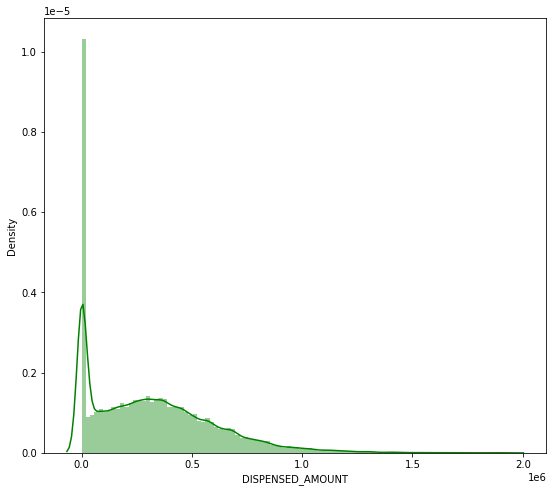

In [12]:
#Now lets take a look at how the DISPENSED_AMOUNT is distributed
plt.figure(figsize=(9, 8))
sns.distplot(df['DISPENSED_AMOUNT'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [13]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int8'), dtype('O')]

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int8'])
df_num.head()

,BANK_ID,DISPENSED_AMOUNT,TOTAL_TRANSACTION_COUNT,DOWNTIME_IN_MINS,ATM_MAX_CAPACITY
0,3,225180.0,90.0,0.0,2860000.0
1,3,262440.0,117.0,0.0,2860000.0
2,3,561150.0,160.0,0.0,2860000.0
3,3,437220.0,129.0,0.0,2860000.0
4,3,360900.0,119.0,0.0,2860000.0


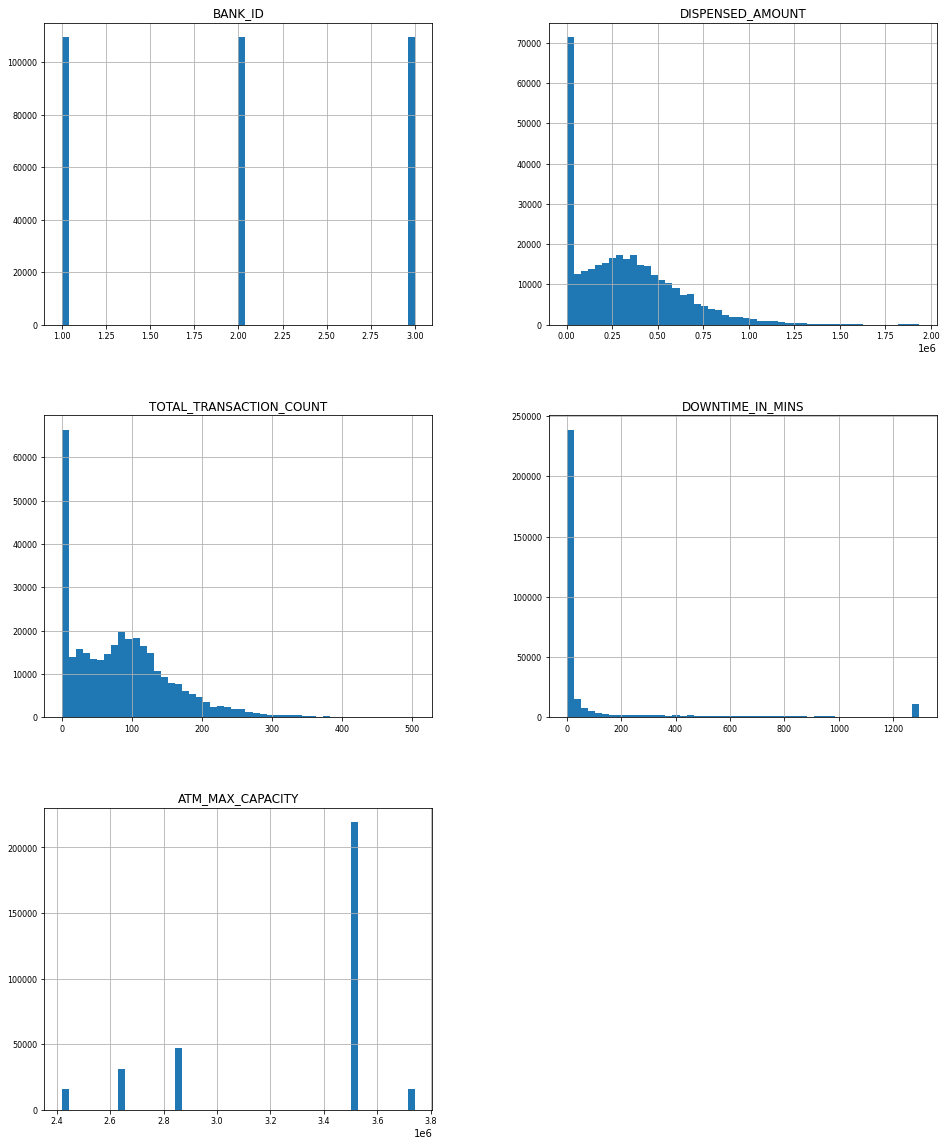

In [15]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [17]:
df.columns

Index(['DATE', 'WEEKDAY_FLAG', 'HOLIDAY_FLAG', 'BANK_ID', 'STATE', 'BANK_NAME',
       'ATM_ID', 'DISPENSED_AMOUNT', 'TOTAL_TRANSACTION_COUNT',
       'DOWNTIME_IN_MINS', 'ATM_MAX_CAPACITY'],
      dtype='object')

([0, 1, 2],
 [Text(0, 0, 'Citibank'), Text(1, 0, 'Wells Fargo'), Text(2, 0, 'BNY Mellon')])

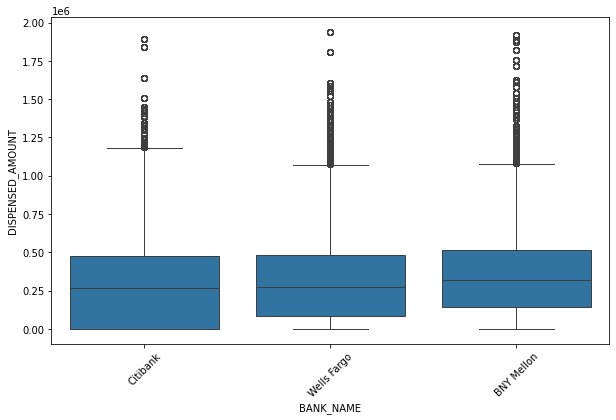

In [18]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BANK_NAME', y='DISPENSED_AMOUNT', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Y'), Text(1, 0, 'N')])

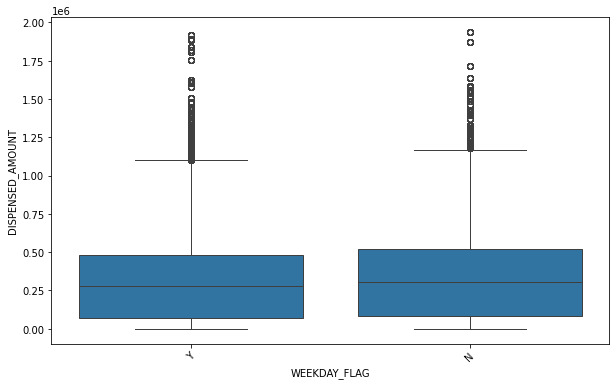

In [20]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='WEEKDAY_FLAG', y='DISPENSED_AMOUNT', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Y'), Text(1, 0, 'N')])

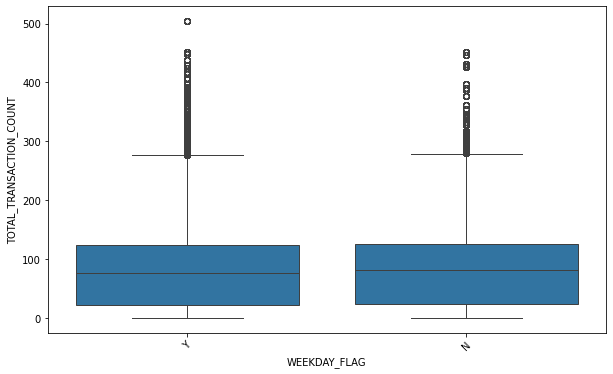

In [22]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='WEEKDAY_FLAG', y='TOTAL_TRANSACTION_COUNT', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'N'), Text(1, 0, 'Y')])

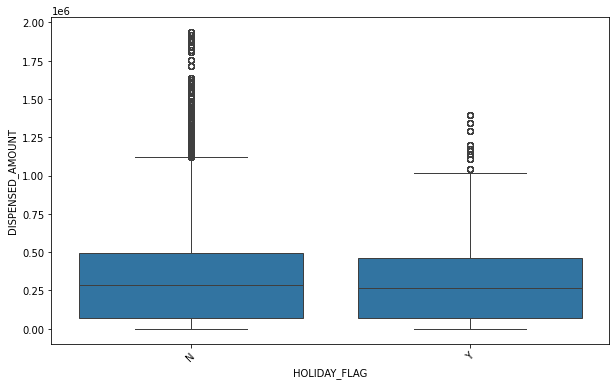

In [21]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='HOLIDAY_FLAG', y='DISPENSED_AMOUNT', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'N'), Text(1, 0, 'Y')])

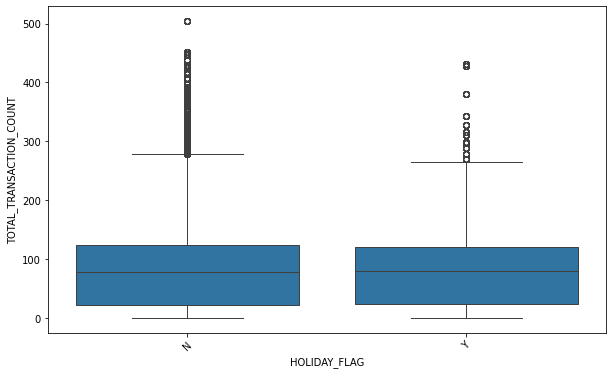

In [23]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='HOLIDAY_FLAG', y='TOTAL_TRANSACTION_COUNT', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

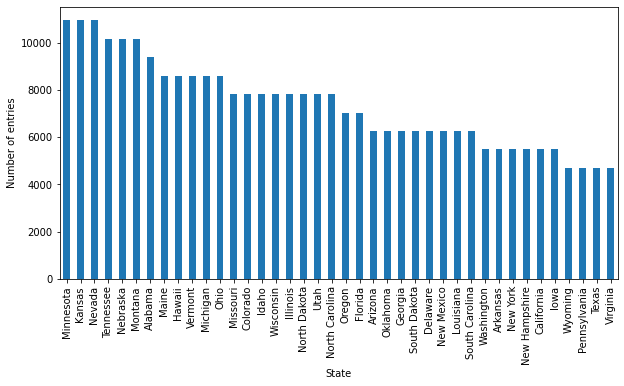

In [25]:
df.STATE.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
#plt.title("Number of cars by make")
plt.ylabel('Number of entries')
plt.xlabel('State');